# Addition of 2 Numbers
## Background
This is a project to build dense networks for perform addtion of 2 numbers between 0-100, by purposely removing certain number(s) from the training data set. For example, 50, or any other number(s).

Certain other notes and considerations:
* This is a classfication problem, not regression.
* Dataset is not given, needs DIY.
* It's obvious that the output needs one-hot encoding, what about input?
* Use model.save & load_model to deal with save and restore

## Preparing the Datasets
### Using random from numpy module to create training datasets.

(20000,)
[40 15 72 ..., 24 62 92]


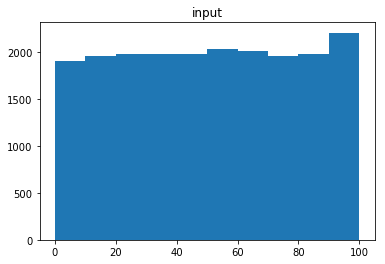

In [47]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Generate 20000 groups of numbers, value from 0 to 101(exclusive)
np.random.seed(2)
input = np.random.randint(0, 101, size=20000)

# Verify the dimension of the dataset
print(input.shape)
print(input)

# Plot the numbers by visually inspecting it's evenly distributed
plt.hist(input)
plt.title("input")

(19766,)
[40 15 72 ..., 24 62 92]
[40 15]


(array([  209.,   560.,   922.,  1381.,  1749.,  1814.,  1419.,  1012.,
          577.,   240.]),
 array([   0. ,   19.9,   39.8,   59.7,   79.6,   99.5,  119.4,  139.3,
         159.2,  179.1,  199. ]),
 <a list of 10 Patch objects>)

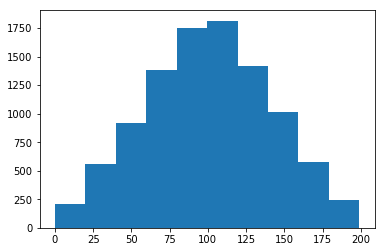

In [48]:
# Remove the numbers that we want the network to perform the prediction
remove_num = [50]
for i in remove_num:
    input = input[input != i]
    # Another way could be
    #iIndex = np.argwhere(input == i)
    #input = np.delete(input, iIndex)

# Remove the last number if the size of input is odd number
input_train = input if input.size%2==0 else input[:input.size-1]
print(input_train.shape)
print(input_train)

# Reshape to groups of 2 integers
input_train = input_train.reshape(int(input_train.size/2), 2)
print(input_train[0])

# Calculate the output and plot it, the result should be normally distributed
output_train = np.sum(input_train, axis=1)
plt.hist(output_train)

In [69]:
# One-hot encode the training output, there are 201 possible values of output
import keras
from keras.models import Model, Sequential
from keras.layers import *
n_classes = 201
print(output_train)

# Normalize the training input
x_train = input_train.astype('float32')
x_train = x_train / 100
#x_train = keras.utils.to_categorical(input_train, 101)
#x_train = x_train.reshape(9883, 202)
#print(input_train.shape, x_train.shape)
y_train = keras.utils.to_categorical(output_train, n_classes)
print(output_train[0], '\n', input_train[0], '\n', x_train[0], '\n', y_train[0], '\n', y_train.shape)

[ 55  94 125 ..., 190  52 154]
55 
 [40 15] 
 [ 0.40000001  0.15000001] 
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.] 
 (9883, 201)


### Create testing datasets
The way to create testing datasets will be slightly different from the training dataset. A two dimensional numpy array will be created first, then we only keep those groups contain the number we want to test against to.

(100000, 2)
(1981, 2)
(1980, 2)


(array([ 216.,  196.,  202.,  205.,  188.,  180.,  191.,  180.,  198.,  224.]),
 array([  50.,   60.,   70.,   80.,   90.,  100.,  110.,  120.,  130.,
         140.,  150.]),
 <a list of 10 Patch objects>)

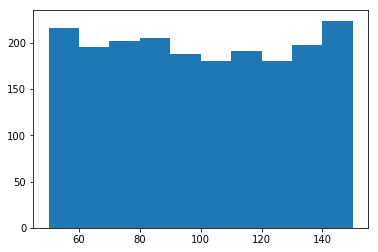

In [70]:
# Create 100000 pairs of integers
np.random.seed(2)
input_test = np.random.randint(0, 101, size=(100000,2))
print(input_test.shape)

# Create a list to store the valid testing cases, numpy array is immunable
temp_list = []
for i in input_test:
    for m in remove_num:
        if i[0] == m or i[1] == m:
            temp_list.append(i)
            # If found match from either element of the group, continue
            continue

# Conver to numpy array
input_test = np.array(temp_list)
print(input_test.shape)

# Remove the last number if the size of testing dataset is odd number
num_rows = input_test.shape[0]
input_test = input_test if num_rows%2==0 else input_test[:num_rows-1]
print(input_test.shape)

# Visually inspecting output_test, the value should range [50,150]
output_test = np.sum(input_test, axis = 1)
plt.hist(output_test)

In [71]:
# One-hot encode the test output same way as training output, normalize the test input
#x_test = keras.utils.to_categorical(input_test, 101)
#x_test = x_test.reshape(1980, 202)
#print(input_test.shape, x_test.shape)
x_test = input_test.astype('float32')
x_test = x_test/100
y_test = keras.utils.to_categorical(output_test, n_classes)

print(x_test[10], '\n', output_test[10], '\n', y_test[10], '\n', y_test.shape)

[ 0.5         0.56999999] 
 107 
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.] 
 (1980, 201)


## Build and Train the Neural Network

In [80]:
# Set up parameters
learning_rate = 0.1
training_epochs = 20
batch_size = 50

# Network parameters
n_input = 2
n_hidden_1 = 2000
n_hidden_2 = 1000
n_hidden_3 = 500
n_classes = 201

# Build network
Inp = Input(shape=(2,))
x = Dense(n_hidden_1, activation='relu', name='Dense_1')(Inp)
x = Dense(n_hidden_2, activation='relu', name='Dense_2')(x)
x = Dense(n_hidden_3, activation='relu', name='Dense_3')(x)
output = Dense(n_classes, activation='softmax', name='Output')(x)

model = Model(Inp, output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
Dense_1 (Dense)              (None, 2000)              6000      
_________________________________________________________________
Dense_2 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
Dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
Output (Dense)               (None, 201)               100701    
Total params: 2,608,201
Trainable params: 2,608,201
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])
print(x_train[0:3])
print(y_train[0:3])

[[ 0.40000001  0.15000001]
 [ 0.72000003  0.22      ]
 [ 0.43000001  0.81999999]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  

In [82]:
history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=training_epochs,
                   verbose=1,
                   validation_data=(x_test, y_test))

Train on 9883 samples, validate on 1980 samples
Epoch 1/20
9883/9883 [==============================] - 6s - loss: 5.2981 - acc: 0.0058 - val_loss: 5.2898 - val_acc: 0.0045
Epoch 2/20
9883/9883 [==============================] - 5s - loss: 5.2883 - acc: 0.0103 - val_loss: 5.2780 - val_acc: 0.0045
Epoch 3/20
9883/9883 [==============================] - 5s - loss: 5.2788 - acc: 0.0097 - val_loss: 5.2652 - val_acc: 0.0045
Epoch 4/20
9883/9883 [==============================] - 5s - loss: 5.2682 - acc: 0.0111 - val_loss: 5.2503 - val_acc: 0.0045
Epoch 5/20
9883/9883 [==============================] - 6s - loss: 5.2557 - acc: 0.0102 - val_loss: 5.2321 - val_acc: 0.0045
Epoch 6/20
9883/9883 [==============================] - 6s - loss: 5.2404 - acc: 0.0096 - val_loss: 5.2094 - val_acc: 0.0045
Epoch 7/20
9883/9883 [==============================] - 6s - loss: 5.2216 - acc: 0.0098 - val_loss: 5.1805 - val_acc: 0.0000e+00
Epoch 8/20
9883/9883 [==============================] - 6s - loss: 5.1988

In [21]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

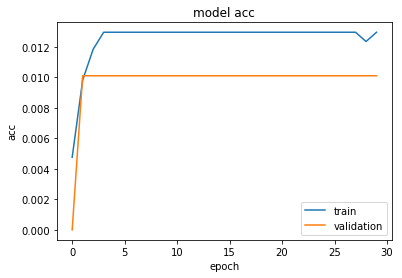

In [22]:
plot_train(history)

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 4.99529207307
Test accuracy: 0.010101010101
